# 06 - Classificação manual

Qual é o resultado para a previsão baseada na famosa frase: "mulheres e crianças primeiro"?

## Preparando o ambiente

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score

## Carregando os dados

In [2]:
titanic = pd.read_csv('../data/processed/train_processed_byage_ag.csv')
del titanic['Unnamed: 0']
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Relateds,faixa_etaria,acompanhado,possui_cabine
0,0,3,male,22,1,0,SC,1,adulto_idoso,True,False
1,1,1,female,38,1,0,C,1,adulto_idoso,True,True
2,1,3,female,26,0,0,SC,0,adulto_idoso,False,False
3,1,1,female,35,1,0,C,1,adulto_idoso,True,True
4,0,3,male,35,0,0,SC,0,adulto_idoso,False,False


In [3]:
teste = pd.read_csv('../data/processed/test_processed.csv')
del teste['Unnamed: 0']
Xvalidacao = teste.drop(columns=['PassengerId'])
teste.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Floor,Relateds,possui_cabine,acompanhado,faixa_etaria
0,892,3,male,34,0,0,SC,0,False,False,jovem_adulto
1,893,3,female,47,1,0,SC,1,False,True,adulto_idoso
2,894,2,male,62,0,0,SC,0,False,False,adulto_idoso
3,895,3,male,27,0,0,SC,0,False,False,jovem_adulto
4,896,3,female,22,1,1,SC,2,False,True,jovem_adulto


In [4]:
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

## Criando o algoritmo de classificação manual

In [5]:
def predict(df):
    predicoes = []
    for index, row in df.iterrows():
        if(row['Sex'] == 'female' or row['Age'] < 15):
            predicoes.append(1)
        else:
            predicoes.append(0)
    return predicoes

In [6]:
accuracy_score(y, predict(X))

0.7901234567901234

A acurácia baseada nessa regra foi de aproximadamente **79%** para os dados de treino. E para os dados de teste?

In [7]:
predicoes = predict(Xvalidacao)
resultado = pd.DataFrame()
resultado['PassengerId'] = teste['PassengerId']
resultado['Survived'] = predicoes
resultado.sample(5)

,PassengerId,Survived
23,915,0
203,1095,1
333,1225,1
92,984,1
107,999,0


In [8]:
resultado.to_csv('../data/submissions/2_women_and_children.csv', index=False)

## Resultado

O resultado obtido no Kaggle foi de **75.3%** de acurácia. Bem semelhante ao obtido com os dados de treinamento. Dessa forma é possível estipular que este seja o valor mínimo, visto que é maior que o do `DummyClassifier`.

In [9]:
ground_truth = pd.read_csv('../data/original/ground_truth.csv')
merged = pd.merge(ground_truth, resultado, on='PassengerId', how='inner', suffixes=('_expected', '_predicted'))
acuracia = round(merged[merged['Survived_expected'] == merged['Survived_predicted']].shape[0] / merged.shape[0] * 100, 2)
print(f'Acurácia de {acuracia}% nos dados de teste (submissão Kaggle)')

Acurácia de 75.36% nos dados de teste (submissão Kaggle)


Temos então que para um algoritmo de Machine Learning ser considerado útil para isso ele precisa ter mais de 76% de acurácia. Segundo [este artigo](https://www.kaggle.com/c/titanic/discussion/26284), um bom modelo deveria ter entre 83 e 84% de acurácia, no máximo 87%. Os envios na competição que possuem mais do que isso estão provavelmente utilizando meios não legítmos de obter. Veja a imagem dos envios para o Kaggle.

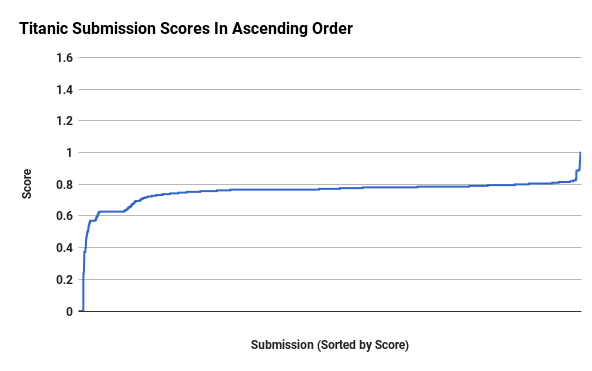